# Students exam performance analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import math


# Loading the data

In [4]:
df=pd.read_csv('E:\SEM 5\LAB\ML LAB\CAT 2\doc\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
new_df=df
new_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [8]:
#Renaming the column name for understanding
df=df.rename(columns={'parental level of education':'parental_level_of_education',
                      'test preparation course':'test_preparation_course',
                     'math score':'math_score','reading score':'reading_score','writing score':'writing_score'})
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#Finding the unique values in each columns
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df.lunch.unique()


array(['standard', 'free/reduced'], dtype=object)

In [11]:
df.test_preparation_course.unique()


array(['none', 'completed'], dtype=object)

In [12]:
#Replacing the char values into unique integer values for the regression


df=df.replace(['group A','group B','group C','group D','group E'],[0,1,2,3,4])
df=df.replace(["bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'],
             [0,1,2,3,4,5])
df=df.replace(['standard', 'free/reduced'],[0,1])
df=df.replace(['none', 'completed'],[0,1])
df=df.replace(['male','female'],[0,1])
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,1,0,0,76,78,75


In [13]:
#Finding the average score of math, reading and writing


df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3 
df['total_score']=df['total_score'].astype(int)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,1,1,0,0,0,72,72,74,72
1,1,2,1,0,1,69,90,88,82
2,1,1,2,0,0,90,95,93,92
3,0,0,3,1,0,47,57,44,49
4,0,2,1,0,0,76,78,75,76


# Linear Regression

In [14]:
x=df[['gender','race/ethnicity','parental_level_of_education','lunch','test_preparation_course','math_score','reading_score','writing_score']]
y=df['total_score']

In [15]:
#The no of rows and columns present in the dataset

x.shape,y.shape

((1000, 8), (1000,))

In [16]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
print(x_train.shape,y_train.shape)


(700, 8) (700,)


In [17]:
print(x_test.shape,y_test.shape)


(300, 8) (300,)


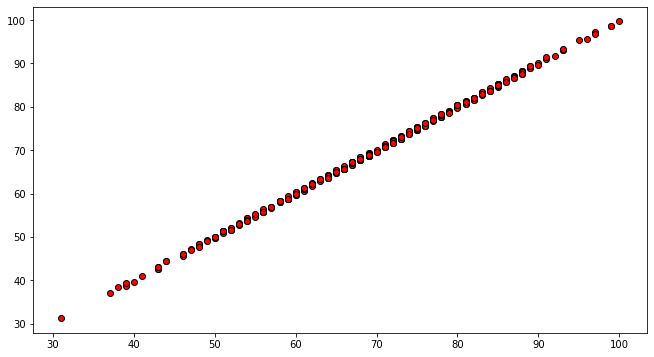

In [18]:
#Linear Regression model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
plt.figure(figsize=(11,6))
plt.scatter(y_test,prediction,edgecolors='black',c='red',vmin=30,vmax=70)

#x.set_yticklabels([30,35,40,45,50])

In [19]:
#Root Mean Square error, the lower RMSE the better is the model

from sklearn import metrics
mean_sq=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(mean_sq)
RMSE

0.2660968535762717

In [20]:
#R2 value, higher the r2 score better is the model

from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9996204135388175

# Multiple Linear Regression

In [21]:
ab= {'x1':df.iloc[:,8],'x2':df.iloc[:,6],'x3':df.iloc[:,7],'y':df.iloc[:,5]}
df=pd.DataFrame(ab)

In [25]:
class SPA:
    def __init__(self):
        self.lst = []

    def mean(self, data):
        return (sum(data) / len(data))

    def Prediction(self, x, y, x1, x2, x3):
        arx = np.array(x)
        #print(arx)
        artx = arx.T
        ary = np.array(y)
        fst = np.linalg.inv(np.dot(artx, arx))
        sec = np.dot(artx, ary)
        res = np.dot(fst, sec)
        b0 = self.mean(y) - (self.mean(x1) * res[0]) - (self.mean(x2) * res[1]) - (self.mean(x3) * res[2])
        print("Regression Equation: Y = ",b0,"+",res[0],"x1 +",res[1],"x2 +",res[2],"x3")
        y_predict=[]
        ss_total=[]
        ss_res=[]
        for i in range(len(x1)):
            y_predict.append(b0 + res[0]*x1[i] + res[1]*x2[i] + res[2]*x3[i]) 
            ss_total.append((y[i] - self.mean(y)) ** 2)
            ss_res.append((y[i] - y_predict[i]) ** 2)
        sss_res=sum(ss_res)
        sss_total=sum(ss_total)
        r2 = 1 - (sss_res/sss_total)
        print('R2 Score',r2)

In [26]:
##R2 value, higher the r2 score better is the model

a=SPA()
a.Prediction(df[['x1','x2','x3']],df['y'],df['x1'],df['x2'],df['x3'])

Regression Equation: Y =  0.04470122352759631 + 2.977836458995796 x1 + -0.9716919576944321 x2 + -0.9931072409958688 x3
R2 Score 0.9969832674919743
